# 기상 상황 주행 분류 프로젝트 (개인)

### Tensorflow Lenet5 구현 이미지 분류

##### 1.데이터 로드

In [4]:
from glob import glob

path = 'D://기상 상황 주행 분류 데이터'

train_data = glob(path+'//Train')


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [6]:
train_ds = image_dataset_from_directory(
    directory=path+'//Train',
    labels = 'inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(32,32),
    seed=100,
    validation_split=0.2,
    subset='training'
)
val_ds = image_dataset_from_directory(
    directory=path+'//Train',
    labels = 'inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(32,32),
    seed=100,
    validation_split=0.2,
    subset='validation'
)

Found 45903 files belonging to 4 classes.
Using 36723 files for training.
Found 45903 files belonging to 4 classes.
Using 9180 files for validation.


In [7]:
train_ds.class_names

['Hazy', 'Normal', 'Rainy', 'Snowy']

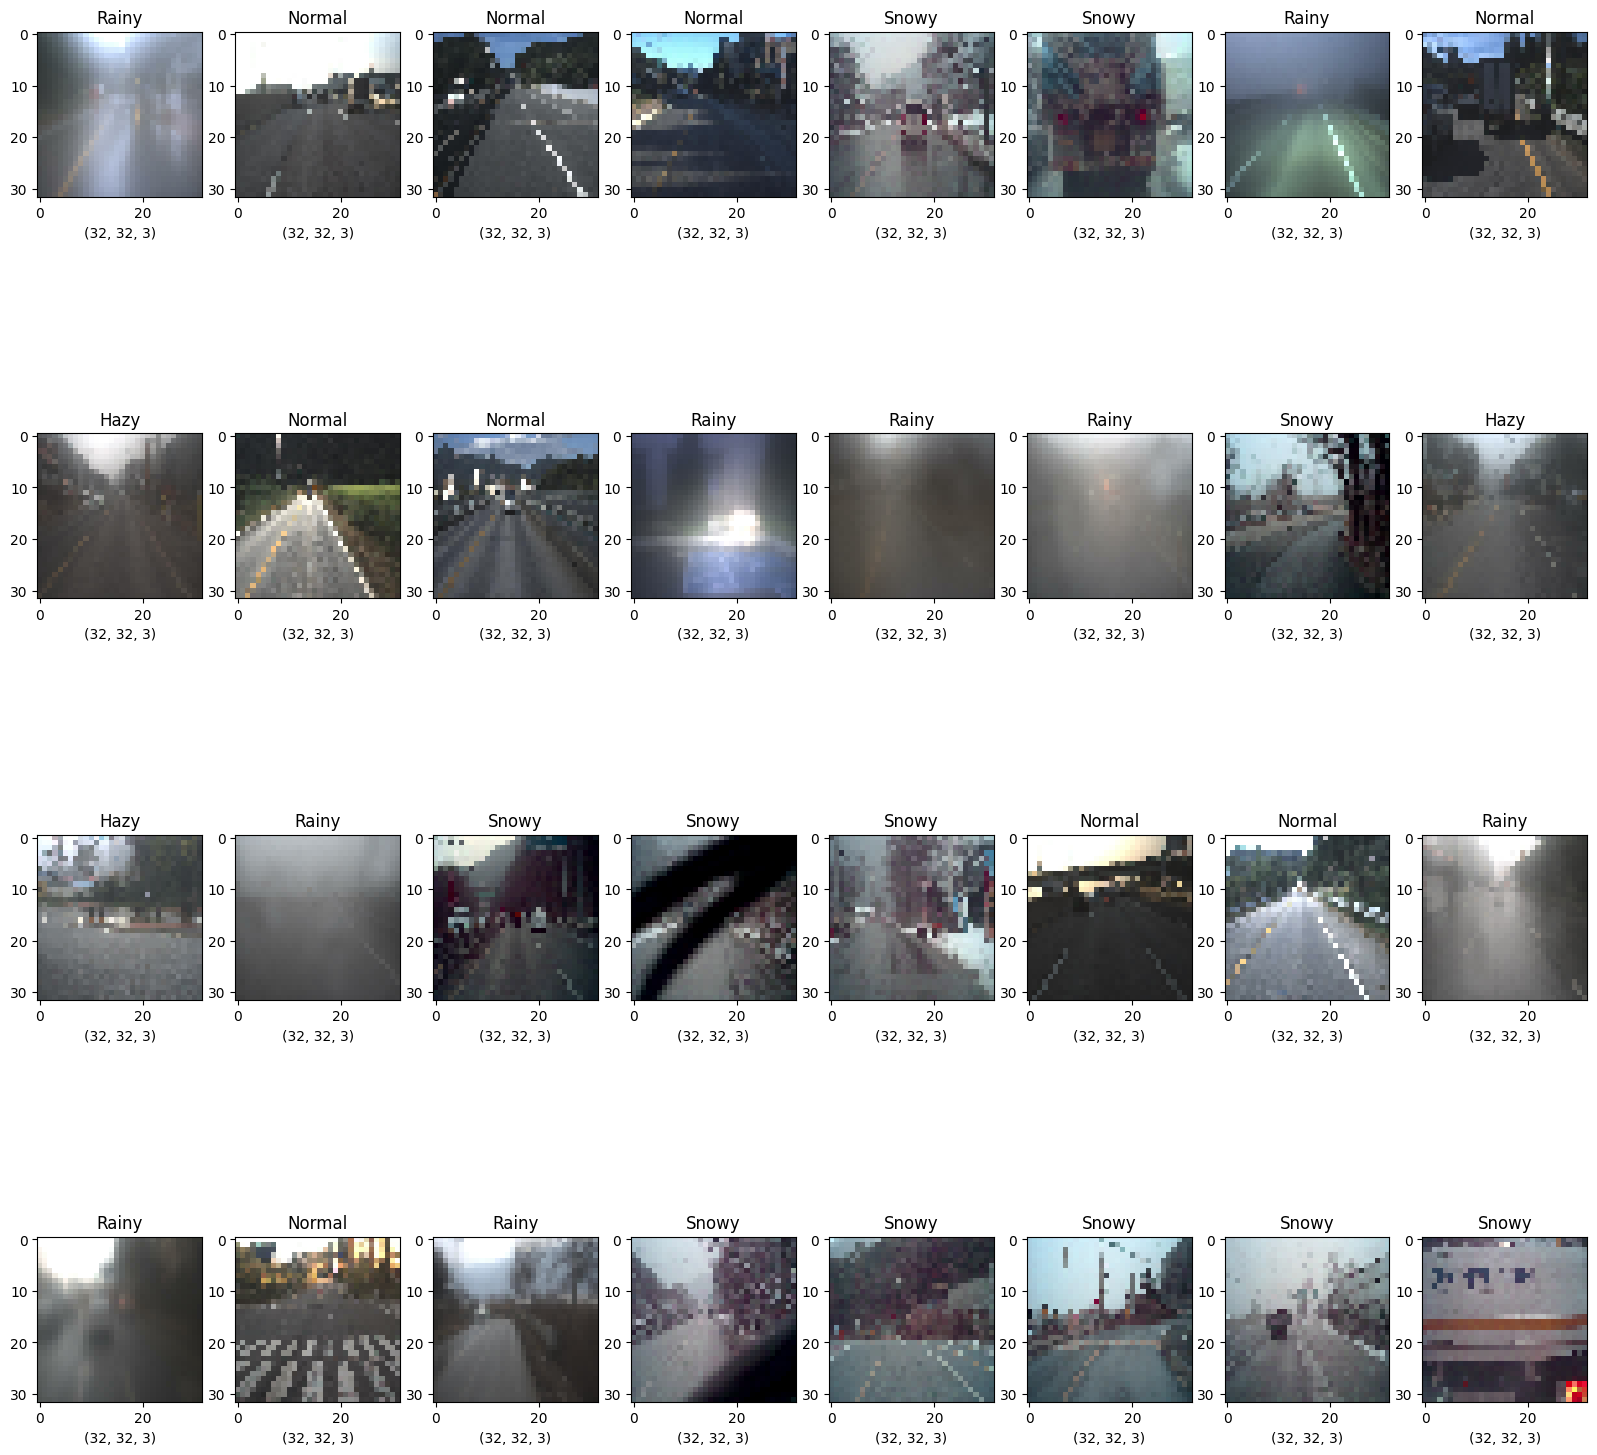

In [8]:
import matplotlib.pyplot as plt
import numpy as np


for images,labels in train_ds.take(1):
    # print(labels)
    plt.figure(figsize=(20,20))
    for i in range(32):
        # print(train_ds.class_names[np.argmax(labels[0][i])])
        # print(labels[0][i])
        plt.subplot(4,8,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(train_ds.class_names[np.argmax(labels[i])])
        plt.xlabel(images[i].numpy().astype('uint8').shape)

##### 2. 데이터 split

In [9]:
test_ds = image_dataset_from_directory(
    directory=path+'//Validation',
    labels = 'inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(32,32),
    seed=100
)

Found 5738 files belonging to 4 classes.


In [10]:
test_ds.class_names

['Hazy', 'Normal', 'Rainy', 'Snowy']

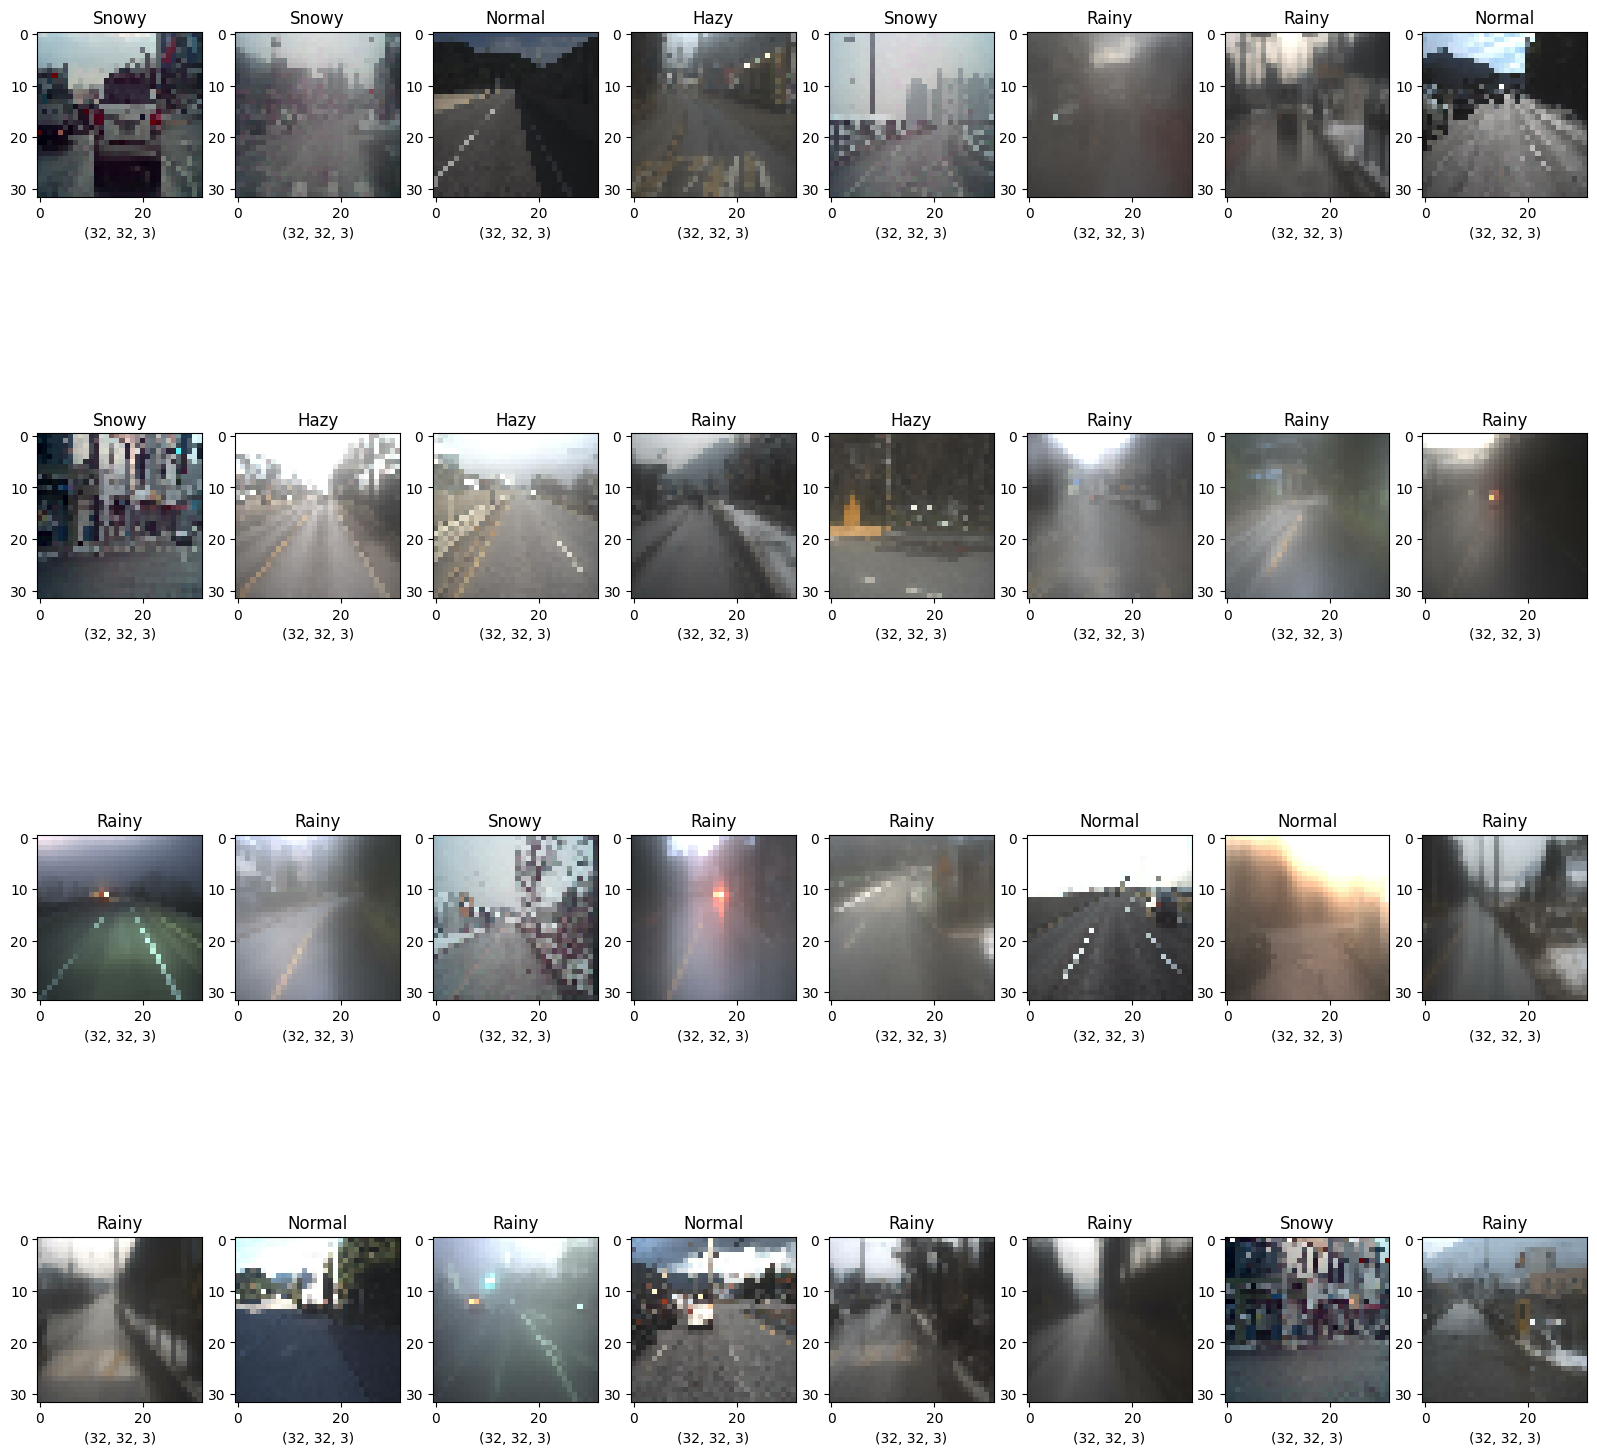

In [11]:
import matplotlib.pyplot as plt
import numpy as np


for images,labels in test_ds.take(1):
    # print(labels)
    plt.figure(figsize=(20,20))
    for i in range(32):
        # print(train_ds.class_names[np.argmax(labels[0][i])])
        # print(labels[0][i])
        plt.subplot(4,8,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(train_ds.class_names[np.argmax(labels[i])])
        plt.xlabel(images[i].numpy().astype('uint8').shape)

##### 3. 모델 구성

In [12]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


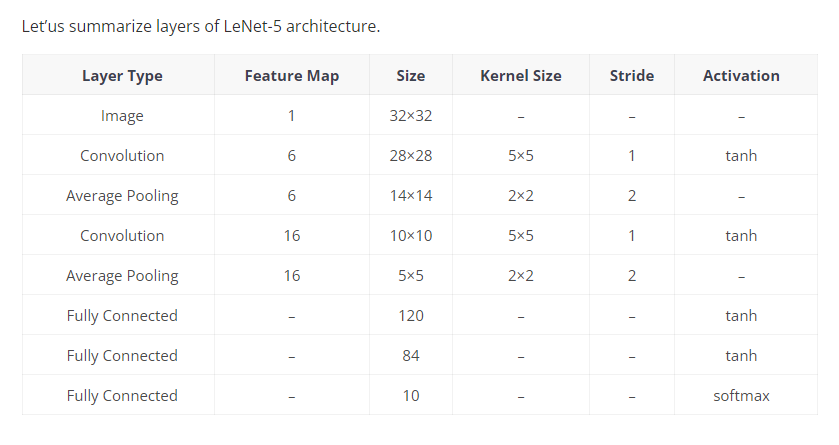

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import experimental,Conv2D,AveragePooling2D,Flatten,Dense

model = Sequential(

    [
    experimental.preprocessing.Rescaling(1./255,input_shape=(32,32,3)),
    # strides = 1 (default)
    Conv2D(6,5,activation='tanh',padding='same'),
    AveragePooling2D(pool_size=(2,2),strides=(2,2),padding='valid'),
    # strides = 1 (default)
    Conv2D(16,5,activation='tanh',padding='valid'),
    AveragePooling2D(pool_size=(2,2),strides=(2,2),padding='valid'),
    Flatten(),
    Dense(120,activation='tanh'),
    Dense(84,activation='tanh'),
    Dense(4,activation='softmax')
    ]
)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 6)         456       
                                                                 
 average_pooling2d (AverageP  (None, 16, 16, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 6, 6, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [15]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['acc'])

##### 4. 학습

In [16]:
history = model.fit(train_ds,validation_data=val_ds,epochs=10)

Epoch 1/10


1148/1148 [==============================] - 60s 49ms/step - loss: 0.5878 - acc: 0.7769 - val_loss: 0.3869 - val_acc: 0.8625
Epoch 2/10
1148/1148 [==============================] - 64s 55ms/step - loss: 0.3469 - acc: 0.8753 - val_loss: 0.2809 - val_acc: 0.9041
Epoch 3/10
1148/1148 [==============================] - 65s 56ms/step - loss: 0.2314 - acc: 0.9197 - val_loss: 0.1897 - val_acc: 0.9368
Epoch 4/10
1148/1148 [==============================] - 66s 57ms/step - loss: 0.1717 - acc: 0.9408 - val_loss: 0.1518 - val_acc: 0.9498
Epoch 5/10
1148/1148 [==============================] - 65s 56ms/step - loss: 0.1304 - acc: 0.9536 - val_loss: 0.1441 - val_acc: 0.9529
Epoch 6/10
1148/1148 [==============================] - 65s 56ms/step - loss: 0.0980 - acc: 0.9662 - val_loss: 0.1163 - val_acc: 0.9614
Epoch 7/10
1148/1148 [==============================] - 65s 56ms/step - loss: 0.0825 - acc: 0.9711 - val_loss: 0.1161 - val_acc: 0.9620
Epoch 8/10
1148/1148 [==============================] - 65s

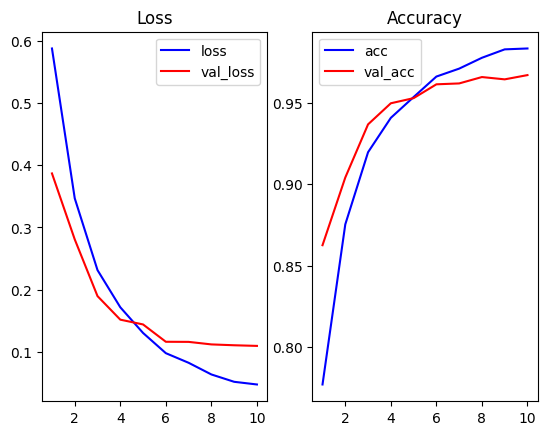

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1,2,1)
plt.plot(range(1,len(loss)+1),loss,color='blue',label='loss')
plt.plot(range(1,len(loss)+1),val_loss,color='red',label='val_loss')
plt.title("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(1,len(acc)+1),acc,color='blue',label='acc')
plt.plot(range(1,len(acc)+1),val_acc,color='red',label='val_acc')
plt.title("Accuracy")
plt.legend()
plt.show()

##### 5.검증

In [18]:
model.evaluate(test_ds)

180/180 [==============================] - 8s 44ms/step - loss: 0.1055 - acc: 0.9688


[0.10546103864908218, 0.9688044786453247]